In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_csv('./output/data/merged_df.csv')

In [146]:
df.columns

Index(['file_path', 'label', 'duration', 'mfcc_1_mean', 'mfcc_2_mean',
       'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean',
       'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean',
       'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'mfcc_14_mean',
       'mfcc_15_mean', 'mfcc_16_mean', 'mfcc_17_mean', 'mfcc_18_mean',
       'mfcc_19_mean', 'mfcc_20_mean', 'mfcc_21_mean', 'mfcc_22_mean',
       'mfcc_23_mean', 'mfcc_24_mean', 'mfcc_25_mean', 'mfcc_26_mean',
       'mfcc_27_mean', 'mfcc_28_mean', 'mfcc_29_mean', 'mfcc_30_mean'],
      dtype='object')

In [147]:
# Drop the 'file_path' column
data = df.drop(columns=['file_path'])

# Convert 'label' column values from 'fake' and 'real' to 0 and 1
data['label'] = data['label'].apply(lambda x: 0 if x == 'fake' else 1)

# Display the updated dataframe
data.head()

,label,duration,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,...,mfcc_21_mean,mfcc_22_mean,mfcc_23_mean,mfcc_24_mean,mfcc_25_mean,mfcc_26_mean,mfcc_27_mean,mfcc_28_mean,mfcc_29_mean,mfcc_30_mean
0,1,6.840000,-304.341270,113.709097,-44.021291,28.256102,13.641230,-13.230529,-9.073119,-25.428404,...,-7.879508,-11.564848,-7.241586,-3.500644,-8.572959,-7.769196,-6.200805,-9.601032,-1.045484,1.696635
1,1,6.070000,-288.430056,156.781227,-42.138849,21.731352,9.175248,-37.561261,-14.877932,-15.617912,...,-10.782125,-11.156759,-9.278637,-7.561083,-6.570046,-6.295412,-5.074236,-3.588240,-3.976979,-4.318006
2,1,5.920000,-313.729559,133.650065,-45.776206,-0.649869,-4.962584,-27.823752,-4.273122,-20.606474,...,-7.809381,-3.840896,-4.639575,-5.083332,-2.645830,-3.523515,-4.064678,-1.823462,-1.784046,-3.711713
3,1,9.849958,-338.528304,110.269715,-26.445261,7.784086,12.008307,-15.176674,-9.363117,-12.151247,...,-6.991639,-4.952648,-4.918112,-5.376414,-5.329774,-4.305240,-3.679742,-3.917728,-2.481780,-1.619357
4,1,5.529958,-288.435487,117.139206,-53.460400,14.722782,-4.214957,-40.313201,-18.616485,-16.192421,...,-8.898185,-8.144262,-5.093298,0.412901,0.513141,1.108503,1.737505,-0.865436,0.617007,0.743553


In [148]:
data.shape

(28491, 32)

In [149]:
features = data.drop(columns=['label','duration'], axis=1).copy()
labels = data['label']

In [150]:
features.columns

Index(['mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean',
       'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean',
       'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean',
       'mfcc_13_mean', 'mfcc_14_mean', 'mfcc_15_mean', 'mfcc_16_mean',
       'mfcc_17_mean', 'mfcc_18_mean', 'mfcc_19_mean', 'mfcc_20_mean',
       'mfcc_21_mean', 'mfcc_22_mean', 'mfcc_23_mean', 'mfcc_24_mean',
       'mfcc_25_mean', 'mfcc_26_mean', 'mfcc_27_mean', 'mfcc_28_mean',
       'mfcc_29_mean', 'mfcc_30_mean'],
      dtype='object')

In [151]:
features.columns.shape[0]

30

In [152]:
features.describe()

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,mfcc_21_mean,mfcc_22_mean,mfcc_23_mean,mfcc_24_mean,mfcc_25_mean,mfcc_26_mean,mfcc_27_mean,mfcc_28_mean,mfcc_29_mean,mfcc_30_mean
count,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,...,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000,28491.000000
mean,-294.359469,128.350110,-49.939734,15.695844,-8.824434,-29.239431,-17.556254,-26.498350,-21.781870,-17.318533,...,-7.305454,-7.305075,-5.444083,-4.355791,-4.104175,-2.991264,-1.916637,-1.077528,-0.862772,-0.321956
std,40.110791,16.737861,20.477045,16.431307,16.548927,8.218472,8.105849,10.900011,6.412058,6.232104,...,3.147947,3.109818,3.162339,3.340511,3.429335,3.796955,3.868063,3.907461,4.091424,4.239001
min,-427.511202,41.619881,-132.519799,-51.660638,-73.887088,-59.937041,-66.826030,-68.913723,-52.224983,-43.391347,...,-19.634654,-28.179092,-22.594905,-16.254429,-17.817578,-13.649520,-18.293898,-14.292117,-13.600392,-12.256773
25%,-325.550267,117.618470,-64.459261,4.238973,-21.303096,-34.501820,-22.597311,-35.113745,-25.754628,-21.289619,...,-9.389770,-9.090538,-7.337905,-6.455320,-6.185438,-5.254311,-4.380936,-3.548065,-3.339132,-3.135386
50%,-295.269233,128.650029,-51.033699,13.861626,-4.930721,-29.244040,-17.094298,-23.986145,-21.812266,-16.632084,...,-7.402455,-7.299450,-5.633367,-4.734413,-4.513160,-3.621158,-2.682717,-1.815018,-1.850596,-1.405937
75%,-262.311238,139.628672,-35.862019,25.983439,3.701130,-24.059418,-11.939252,-18.003519,-17.702517,-13.075360,...,-5.417171,-5.524412,-3.906976,-2.751645,-2.585890,-1.648368,-0.335136,0.505707,0.550261,1.532514
max,-124.937522,188.442505,28.522664,131.139593,40.257805,1.311399,14.682796,-0.963064,6.557127,18.941476,...,19.440140,13.960390,25.641637,26.610271,23.217386,27.676192,32.457459,27.320994,35.068053,31.041156


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import create_sequences
import pickle

In [154]:
# 1. Create sequences
sequence_length = 2
overlap = 1
print(features.shape)
sequences, indices = create_sequences(features, sequence_length, overlap)
labels = labels[indices]

# 2. Pad sequences
padded_sequences = pad_sequences(
    sequences, maxlen=2, padding="pre", truncating="post"
)

# 1. First split the data
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, 
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# 2. Fit scaler only on training data
scaler = StandardScaler()
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)

# Fit on training, transform both
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)

# 3. Reshape back
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_val_scaled = X_val_scaled.reshape(X_val.shape)
# Save the train and validation data
np.save('./output/X_train.npy', X_train)
np.save('./output/X_val.npy', X_val)
np.save('./output/y_train.npy', y_train)
np.save('./output/y_val.npy', y_val)
with open('./output/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

(28491, 30)


In [155]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Bidirectional, Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, BatchNormalization

# 2. Create LSTM model
model = Sequential()
input_shape = (features.shape[0], features.shape[1])
model.add(Input(shape=input_shape))
model.add((LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add((LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add((LSTM(128, return_sequences=False)))
# Fully Connected layers
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Adjust units as needed
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# 3. Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, clipvalue=0.5), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=500, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 28491, 128)     │        81,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 28491, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 28491, 128)     │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 28491, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,521 (1.69 MB)

 Trainable params: 443,521 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
# 4. Training with separate validation data
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(X_val_scaled, y_val),
    callbacks=callbacks ,
)

with open('./output/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.5761 - loss: 0.9697 - val_accuracy: 0.6867 - val_loss: 0.8059 - learning_rate: 1.0000e-04
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.7002 - loss: 0.7558 - val_accuracy: 0.7524 - val_loss: 0.6277 - learning_rate: 1.0000e-04
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.7504 - loss: 0.6156 - val_accuracy: 0.7848 - val_loss: 0.5322 - learning_rate: 1.0000e-04
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7746 - loss: 0.5423 - val_accuracy: 0.7987 - val_loss: 0.4825 - learning_rate: 1.0000e-04
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7926 - loss: 0.4934 - val_accuracy: 0.8080 - val_loss: 0.4536 - learning_rate: 1.0000e-04
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7993 - loss: 0.4704 - val_accuracy: 0.8150 - val_loss: 0.4307 - learning_rate: 1.0000e-04
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/st

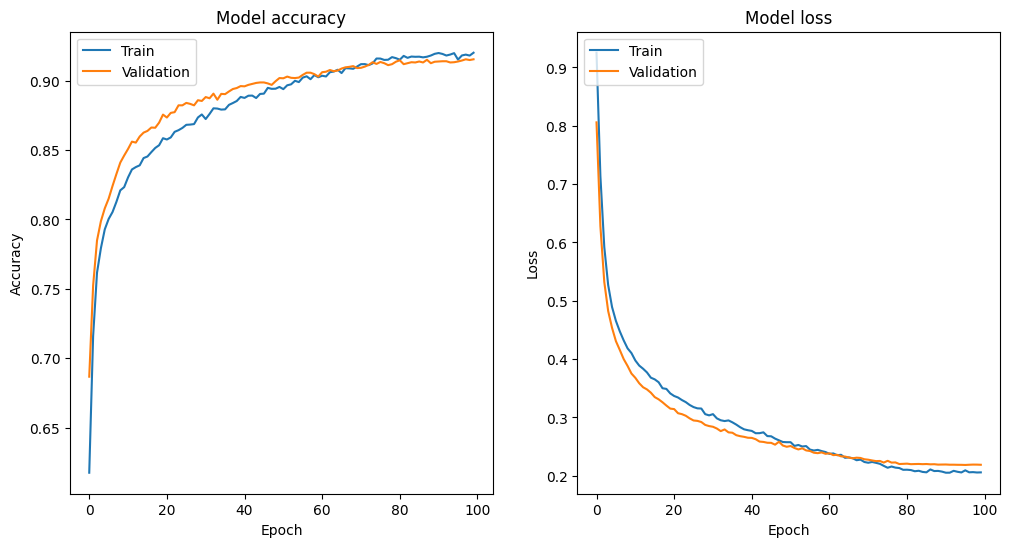

In [157]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [158]:
from scipy.ndimage import gaussian_filter1d

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

sacc = gaussian_filter1d(acc, sigma=2)
sval_acc = gaussian_filter1d(val_acc, sigma=2)

sloss = gaussian_filter1d(loss, sigma=2)
sval_loss = gaussian_filter1d(val_loss, sigma=2)

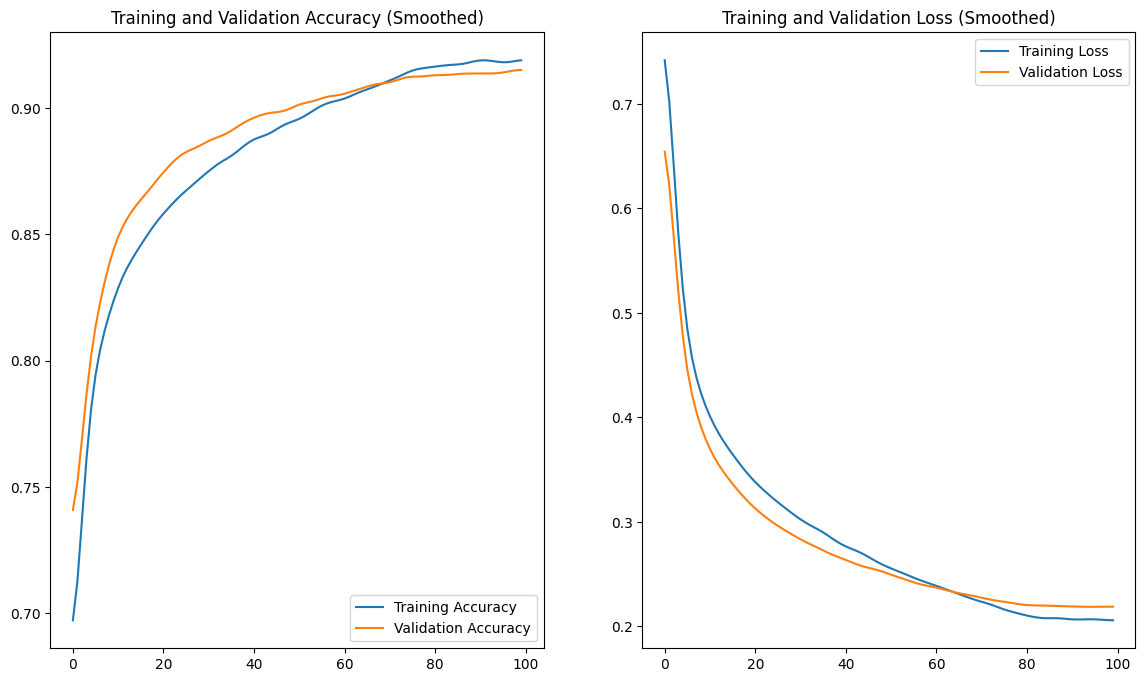

In [159]:
EPOCHS = len(acc)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), sacc, label='Training Accuracy')
plt.plot(range(EPOCHS), sval_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Smoothed)')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), sloss, label='Training Loss')
plt.plot(range(EPOCHS), sval_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Smoothed)')
plt.show()

# Evaluation

In [160]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2848
           1       0.92      0.91      0.91      2850

    accuracy                           0.91      5698
   macro avg       0.91      0.91      0.91      5698
weighted avg       0.91      0.91      0.91      5698



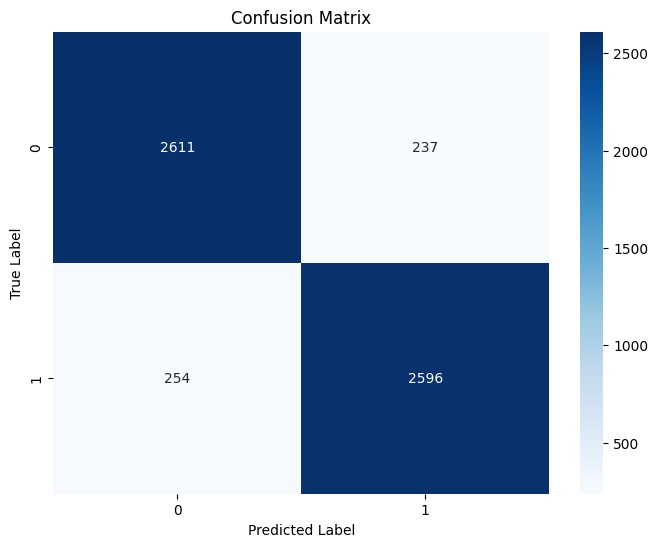

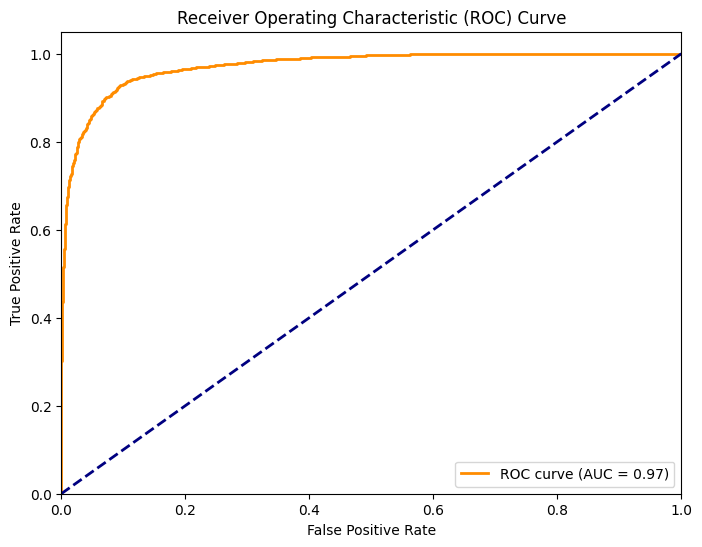


Detailed Metrics:
AUC-ROC Score: 0.9721
Accuracy: 0.9138
True Negatives: 2611
False Positives: 237
False Negatives: 254
True Positives: 2596


In [161]:
# 1. Load model and predict
model = keras.models.load_model("best_model.keras")
y_pred = model.predict(X_val_scaled)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# 2. Print classification metrics
print("\nClassification Report:")
print(classification_report(y_val, y_pred_binary))

# 3. Create confusion matrix
cm = confusion_matrix(y_val, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Print additional metrics
print("\nDetailed Metrics:")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print(f"Accuracy: {(y_pred_binary == y_val).mean():.4f}")
print(f"True Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")